# Linear Regression by Hand

In this challenge we'll be doing a linear fit with just one input variable and one output. We'll assume that our data can be modeled using the function y = ax + b for some values of a and b. Your job is to find the best values of a and b, the ones that make our model best fit the data. First, let's import the libraries we'll need.

In [0]:
# LAMBDA SCHOOL
# 
# MACHINE LEARNING
#
# MIT LICENSE

import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


Now let's grab the data. This is a fictional data set made for the purpose of this exercise.

In [0]:
url="https://raw.githubusercontent.com/mathewphilipc/LambdaDataSets/master/linear_data.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

Your first job is to visit that URL and poke around in the data. However you wish to do so, store the first column as a vector x and store the second column as a vector y. We'll think of x as the input and y as the output.

In [3]:
# You do: x and y

print(data.shape)
data.head()

(100, 2)


,x,y
0,205.382872,616.407840
1,221.233713,652.421931
2,245.569860,645.846659
3,253.604459,775.237334
4,271.523391,780.029564


In [0]:
x = data['x']
y = data['y']

We also like to start by getting a sense of this data, so next let's make a scatterplot.

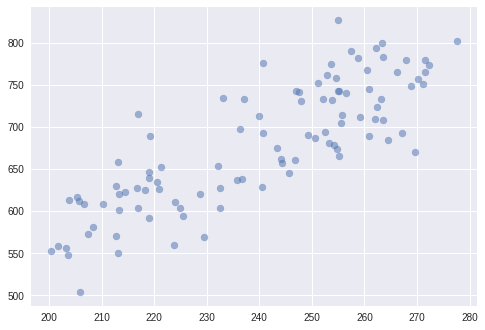

In [5]:
plt.scatter(x, y, alpha=0.5);

Now here's the fun part: whenever we model data like this using a function f(x), we like to compute the "SSE", or "sum of squared errors."

This means that, for every input number x_i, we calculate both the actual corresponding output y_i and the output the model predicts, which is f(x_i).

We can quantify how badly the model did at predicting that point by calculating the square of the difference between the two: error_i = (y_i - f(x_i))^2.

Then we can quantify how badly the model did at all points by computing that squared difference for every indidividual point and adding them all up. Remember bigger = worse here.

Calculate the SSE (call it particular_SSE) we would get if we used the linear model f(x) = ax + b with a = 20 and b = 70.

In [6]:
# What is SSE for a = 20, b = 70?

sse = 0
for xi, yi in zip(x, y):
    yhat = 20*xi + 70
    sse += (yi-yhat)**2
    
print('Sum of squared errors:', sse)

Sum of squared errors: 1767473752.713384


Now here's the really fun part: write a function error(a,b) that takes in the numbers a and b as inputs and calculates the SSE we would get using the model f(x) = ax + b.

In [0]:
def error(a,b):
    # You implement
    global x, y
    
    sse = 0
    for xi, yi in zip(x, y):
        yhat = a*xi + b
        sse += (yi-yhat)**2
        
    return sse

In [8]:
error(1, 1)

19517701.62474722

Earlier we calculated error(a,b) when a = 20 and b = 70. What happens to the error if you replace that with a = 21? Does the error go up or down? What about if we replace a = 20 with a = 19 instead? What if we start tweaking b as well? However you want to do so, tweak a and b to make the SSE as small as possible. Report back with the a and b that you find and the corresponding SSE.

We can visualize the error as a function of a and b by making a 3D plot.

In [0]:
# a, b, SSE? How'd you get it?

A, B = np.linspace(-10, 10, 100), np.linspace(-100, 100, 100)
av, bv = np.meshgrid(A, B)

error_v = np.vectorize(error)
Z = error_v(av, bv)

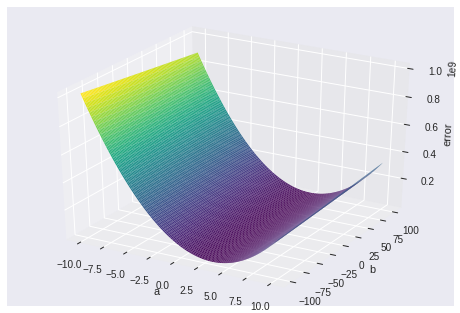

In [10]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(av, bv, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor=None)
ax.set(xlabel='a', ylabel='b', zlabel='error');

We can get a good initial guess for the best set of a and b by calling the argmin on our array of errors.

a: 2.7273, b: 25.2525, error: 164204


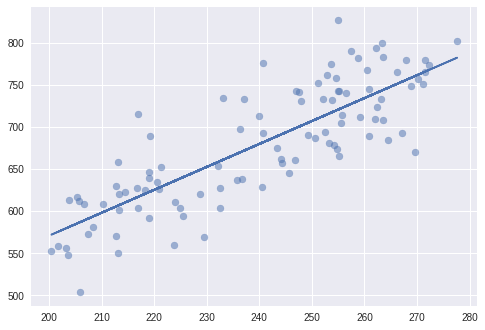

In [11]:
a_init, b_init = av.reshape(-1)[np.argmin(Z)], bv.reshape(-1)[np.argmin(Z)]

err_init = error(a_init, b_init)

print('a: {:.4f}, b: {:.4f}, error: {:.0f}'.format(a_init, b_init, err_init))

plt.scatter(x, y, alpha=0.5)
plt.plot(x, x*a_init+b_init);

We can exactly compute the values for a and b through the following:

$b = \hat{y} - a\hat{x}$, 
$a = \frac{S_{xy}}{S_{xx}}$

Where $S_{xy} = \sum_{i=1}^{n}(\hat{x}-x_i)(\hat{y}-y_i)$, $S_{xx} = \sum_{i=1}^{n}(\hat{x}-x_i)^2$

https://en.wikipedia.org/wiki/Residual_sum_of_squares#Relation_with_Pearson's_product-moment_correlation

a: 2.7990, b: 7.7689, error: 163956


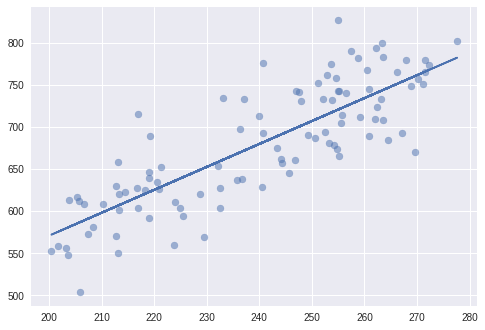

In [12]:
S_xy = np.sum((np.mean(x)-x) * (np.mean(y)-y))

S_xx = np.sum(np.power(np.mean(x)-x, 2))

a = S_xy / S_xx
b = np.mean(y) - a*(np.mean(x))

err = error(a, b)

print('a: {:.4f}, b: {:.4f}, error: {:.0f}'.format(a, b, err))

plt.scatter(x, y, alpha=0.5)
plt.plot(x, x*a_init+b_init);

